# Inteligência Artificial 2025-1
#### Previsão do Nível do Rio em Rio do Sul com Regressão Linear

Autor: Igor Kammer Grahl

## **Etapa 1: Leitura e Análise Inicial dos Dados**

O primeiro passo do projeto é carregar o conjunto de dados, realizar a limpeza e a análise exploratória para entender a estrutura, a distribuição e as relações entre as variáveis.

### **1.1. Leitura e Limpeza dos Dados**

O código abaixo carrega o arquivo CSV, renomeia as colunas para um formato mais acessível (sem espaços ou acentos), remove linhas duplicadas e converte os valores numéricos, que usam vírgula como separador decimal, para o tipo float.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

In [4]:
## 1. Leitura e Limpeza dos Dados

# 1.1 Carregar o dataset
df = pd.read_csv('dados_rio_e_chuva - Planilha1.csv', sep=',')

# 1.2 Renomear colunas (sem espaços/acentos)
df = df.rename(columns={
    'NivelRiodoSul': 'nivel_rio',
    'NívelItuporanga': 'nivel_ituporanga',
    'ChuvaItuporanaga': 'chuva_ituporanga',
    'NívelTaió': 'nivel_taio',
    'ChuvaTaió': 'chuva_taio'
})

# 1.3 Remover duplicatas
df = df.drop_duplicates()

# 1.4 Converter vírgula decimal para ponto e para float
for col in df.columns:
    df[col] = df[col].astype(str).str.replace(',', '.', regex=False).astype(float)

# 1.5 Visualizar o resultado
display(df.head())
df.info()
df.describe()

# 1.6 Verificar valores faltantes e duplicatas
print("Valores faltantes por coluna:\n", df.isnull().sum())
print("Número de duplicatas após limpeza: ", df.duplicated().sum())

,nivel_rio,nivel_ituporanga,chuva_ituporanga,nivel_taio,chuva_taio
0,170.0,30.0,3.0,98.0,0.0
1,170.0,39.0,12.0,98.0,0.0
2,169.0,59.0,19.0,98.0,0.0
3,169.0,82.0,5.0,98.0,0.0
4,169.0,27.0,1.0,97.0,0.0


<class 'pandas.core.frame.DataFrame'>
Index: 40277 entries, 0 to 65405
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   nivel_rio         40277 non-null  float64
 1   nivel_ituporanga  40277 non-null  float64
 2   chuva_ituporanga  40277 non-null  float64
 3   nivel_taio        40277 non-null  float64
 4   chuva_taio        40277 non-null  float64
dtypes: float64(5)
memory usage: 1.8 MB
Valores faltantes por coluna:
 nivel_rio           0
nivel_ituporanga    0
chuva_ituporanga    0
nivel_taio          0
chuva_taio          0
dtype: int64
Número de duplicatas após limpeza:  0


### **1.2. Análise Exploratória (EDA)**

Com os dados limpos, a próxima etapa é a análise exploratória para visualizar as características dos dados.

O código a seguir gera:

1.  **Histograma da variável alvo (nivel_rio):** Mostra a frequência de cada faixa de nível do rio, ajudando a entender sua distribuição.
2.  **Pairplot:** Cria uma matriz de gráficos de dispersão para visualizar a relação entre cada par de variáveis.
3.  **Heatmap de Correlação:** Exibe uma matriz de correlação, onde as cores mais fortes indicam uma relação linear mais forte entre as variáveis.

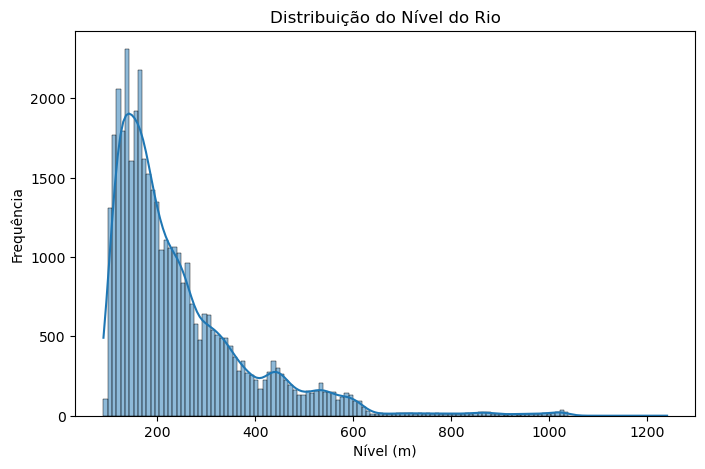

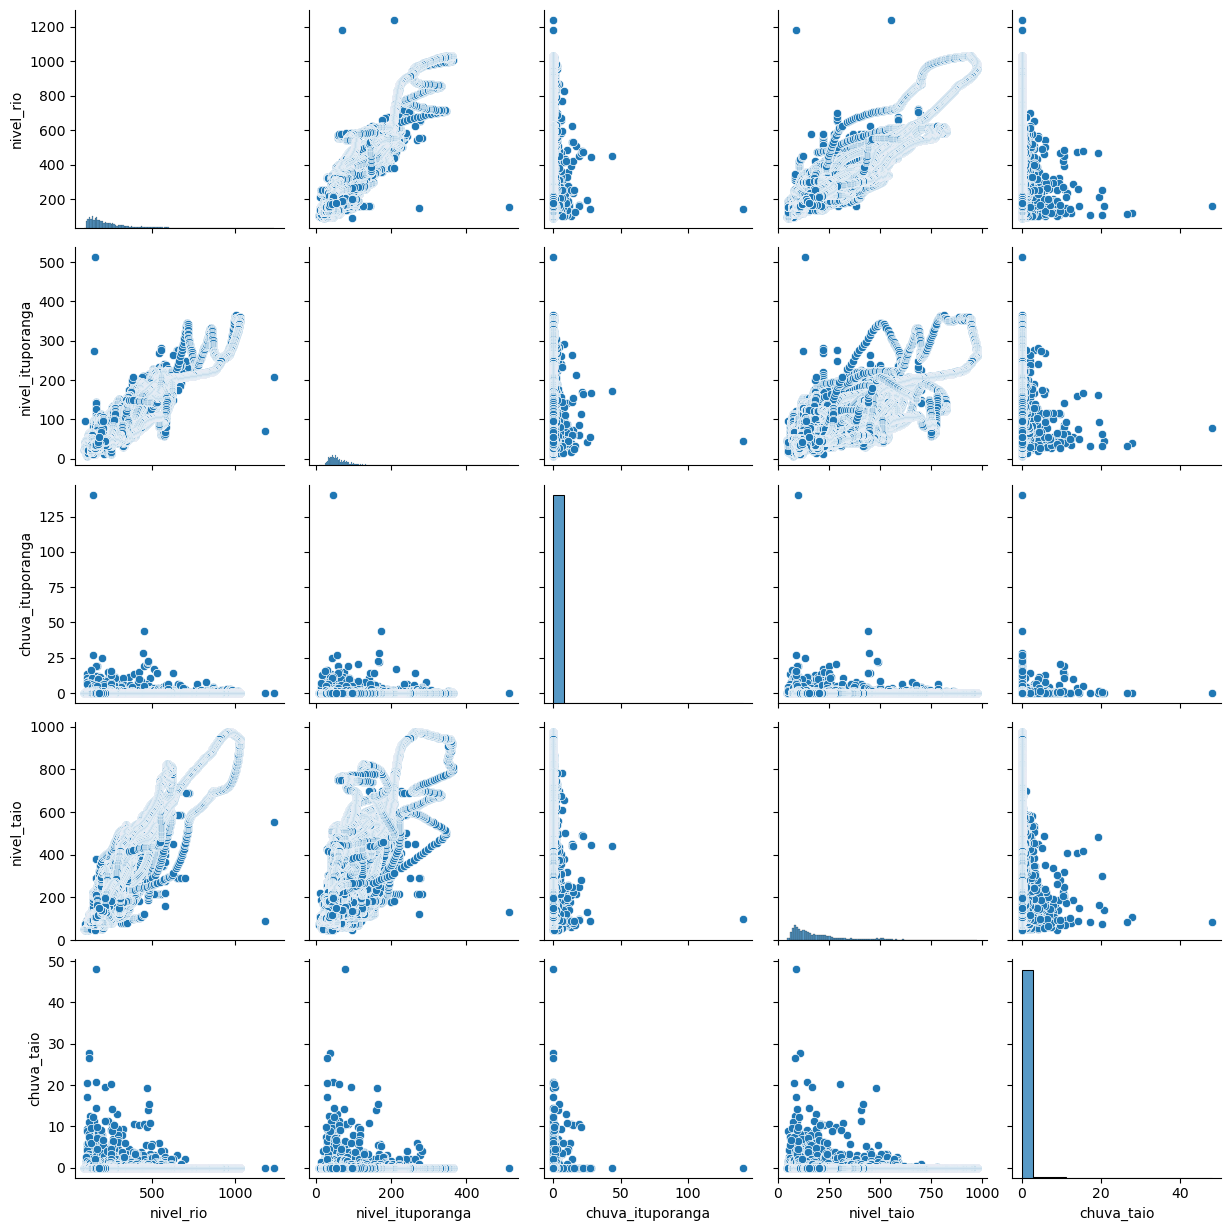

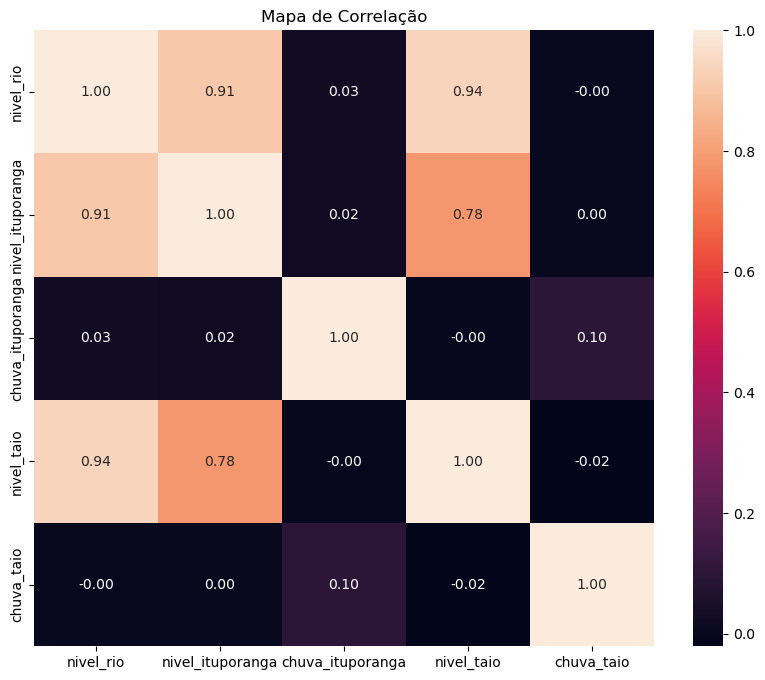

In [5]:
## 2. Análise Exploratória de Dados (EDA)

# 2.1 Histograma do nível do rio
plt.figure(figsize=(8,5))
sns.histplot(df['nivel_rio'], kde=True)
plt.title('Distribuição do Nível do Rio')
plt.xlabel('Nível (m)')
plt.ylabel('Frequência')
plt.show()

# 2.2 Pairplot
sns.pairplot(df)
plt.show()

# 2.3 Heatmap de correlação
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.title('Mapa de Correlação')
plt.show()

Gráficos Gerados:
    
* Histograma:
* Heatmap de Correlação:
        
A análise do heatmap revela uma forte correlação positiva entre o **nivel_rio** e as variáveis **nivel_ituporanga** e **nivel_taio**, o que é um bom indicativo para o modelo de regressão.

## **Etapa 2: Pré-processamento**

Antes de treinar o modelo, os dados precisam ser preparados. As etapas principais são:

* **Divisão em Treino e Teste:** O dataset é dividido em um conjunto de treinamento (70%) e um conjunto de teste (30%). O modelo aprende com os dados de treino e sua performance é avaliada nos dados de teste, que ele nunca viu antes.
* **Normalização/Padronização:** As variáveis de entrada são padronizadas usando StandardScaler. Este processo ajusta a escala das features para que tenham média zero e desvio padrão um, evitando que variáveis de maior magnitude dominem o modelo.
    
Essas etapas são realizadas dentro dos blocos de treinamento a seguir.

## Etapa 3: Treinamento do Modelo

Foram treinados e avaliados diferentes modelos para encontrar a melhor combinação de variáveis de entrada. As métricas de avaliação utilizadas foram:

* **RMSE (Root Mean Squared Error):** A raiz quadrada da média dos erros ao quadrado. É sensível a grandes erros.
* **MAE (Mean Absolute Error):** A média do valor absoluto dos erros. É mais fácil de interpretar.
* **R² (Coeficiente de Determinação):** Indica a proporção da variância na variável dependente que é previsível a partir das variáveis independentes. Varia de 0 a 1 (melhor).

**3.1. Modelo Completo (4 Features)**

Este modelo utiliza todas as variáveis disponíveis como entrada (**nivel_ituporanga, chuva_ituporanga, nivel_taio, chuva_taio**) para prever **nivel_rio**. O código define as variáveis, divide os dados, padroniza as features de treino e teste, treina o modelo de regressão linear e avalia seu desempenho.


In [6]:
## 3. Modelo Completo (4 Features)

# 3.1 Definir X e y
X_full = df[['nivel_ituporanga', 'chuva_ituporanga', 'nivel_taio', 'chuva_taio']]
y_full = df['nivel_rio']

# 3.2 Dividir treino/teste
Xf_train, Xf_test, yf_train, yf_test = train_test_split(
    X_full, y_full, test_size=0.3, random_state=42
)

# 3.3 Padronizar
dscaler = StandardScaler()
Xf_train_s = dscaler.fit_transform(Xf_train)
Xf_test_s  = dscaler.transform(Xf_test)

# 3.4 Treinar o modelo
full_model = LinearRegression()
full_model.fit(Xf_train_s, yf_train)

# 3.5 Avaliação
yf_pred = full_model.predict(Xf_test_s)
print(f"RMSE (completo): {np.sqrt(mean_squared_error(yf_test, yf_pred)):.3f}")
print(f"MAE  (completo): {mean_absolute_error(yf_test, yf_pred):.3f}")
print(f"R2   (completo): {r2_score(yf_test, yf_pred):.3f}")

RMSE (completo): 29.271
MAE  (completo): 18.549
R2   (completo): 0.957


Análise: O modelo completo apresentou um excelente desempenho, com um R² de 0.957, o que significa que ele consegue explicar **95.7%** da variação do nível do rio em Rio do Sul.

**3.2. Experimentos com Outras Combinações**

Para verificar a importância de cada variável, foram realizados experimentos utilizando apenas as features de chuva.

#### **Modelo Simplificado (Apenas Chuvas):**

In [7]:
## 4. Modelo Simplificado (2 Features de Chuvas)

# 4.1 Definir X2 e y (somente chuvas)
X2 = df[['chuva_ituporanga', 'chuva_taio']]
y2 = df['nivel_rio']

# 4.2 Dividir treino/teste
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.3, random_state=42
)

# 4.3 Padronizar
scaler2 = StandardScaler().fit(X2_train)
X2_train_s = scaler2.transform(X2_train)
X2_test_s  = scaler2.transform(X2_test)

# 4.4 Treinar o modelo simplificado
model2 = LinearRegression().fit(X2_train_s, y2_train)

# 4.5 Avaliação
y2_pred = model2.predict(X2_test_s)
print(f"RMSE (chuvas): {np.sqrt(mean_squared_error(y2_test, y2_pred)):.3f}")
print(f"MAE  (chuvas): {mean_absolute_error(y2_test, y2_pred):.3f}")
print(f"R2   (chuvas): {r2_score(y2_test, y2_pred):.3f}")

RMSE (chuvas): 141.435
MAE  (chuvas): 103.724
R2   (chuvas): 0.001


#### O código abaixo testa sistematicamente as variáveis de chuva de forma isolada e combinada.

In [8]:
## 5. Experimentos com Combinações de Features
feature_sets = [
    ['chuva_ituporanga'],
    ['chuva_taio'],
    ['chuva_ituporanga', 'chuva_taio'],
]
for feats in feature_sets:
    Xf = df[feats]
    Xt, Xv, yt, yv = train_test_split(Xf, y2, test_size=0.3, random_state=42)
    s = StandardScaler().fit(Xt)
    m = LinearRegression().fit(s.transform(Xt), yt)
    yp = m.predict(s.transform(Xv))
    print(f"Features={feats} → RMSE={np.sqrt(mean_squared_error(yv, yp)):.3f}, MAE={mean_absolute_error(yv, yp):.3f}, R2={r2_score(yv, yp):.3f}")

Features=['chuva_ituporanga'] → RMSE=141.428, MAE=103.719, R2=0.001
Features=['chuva_taio'] → RMSE=141.510, MAE=103.777, R2=-0.000
Features=['chuva_ituporanga', 'chuva_taio'] → RMSE=141.435, MAE=103.724, R2=0.001


Análise dos Experimentos: Os resultados confirmam que as variáveis de chuva, isoladamente, não são bons preditores do nível do rio (**R²** próximo de zero). A combinação das variáveis de nível e chuva no modelo completo é a que apresenta o melhor desempenho.

## **Etapa 4: Salvar o Modelo**

O modelo final com melhor desempenho (o modelo completo) e seu respectivo **scaler** (usado para a padronização) são salvos em arquivos. Isso permite que o modelo seja reutilizado no futuro sem a necessidade de um novo treinamento. A biblioteca **joblib** é eficiente para salvar objetos **NumPy**, sendo ideal para modelos **scikit-learn**.

In [9]:
## 6. Salvando Modelos e Scalers

# Salvar modelo completo e scaler
joblib.dump(dscaler, 'scaler_full.pkl')
joblib.dump(full_model, 'model_full.pkl')

# Salvar modelo simplificado e scaler2
joblib.dump(scaler2, 'scaler_chuvas.pkl')
joblib.dump(model2, 'model_chuvas.pkl')

['model_chuvas.pkl']

## **Etapa 5: Aplicação**

Para a aplicação final, foram criadas funções que permitem ao usuário informar os dados de entrada e receber a previsão do nível do rio. A função prever_completo utiliza o melhor modelo treinado. Ela carrega o modelo e o scaler salvos, aplica a mesma padronização dos dados de treino e retorna a predição.


In [11]:
## 7. Funções de Previsão (Corrigido para remover warnings)

# 7.1 Modelo completo (4 inputs)
def prever_completo(nivel_it, chuva_it, nivel_t, chuva_t):
    # Obter os nomes das colunas que o scaler aprendeu
    feature_names = dscaler.get_feature_names_out()
    
    # Criar um DataFrame do Pandas com os dados de entrada e os nomes das colunas
    x_df = pd.DataFrame([[nivel_it, chuva_it, nivel_t, chuva_t]], columns=feature_names)
    
    # Padronizar os dados usando o DataFrame
    xs = dscaler.transform(x_df)
    
    # Realizar a previsão
    return full_model.predict(xs)[0]

# 7.2 Modelo simplificado (2 inputs)
def prever_chuvas(chuva_it, chuva_t):
    # Obter os nomes das colunas que o scaler aprendeu
    feature_names_chuva = scaler2.get_feature_names_out()
    
    # Criar um DataFrame
    x_df = pd.DataFrame([[chuva_it, chuva_t]], columns=feature_names_chuva)
    
    # Padronizar e prever
    xs = scaler2.transform(x_df)
    return model2.predict(xs)[0]

# 7.3 Exemplos de uso
print("Exemplo completo:", prever_completo(82, 5, 160, 0))
print("Exemplo só chuvas:", prever_chuvas(5, 0))

Exemplo completo: 237.6766388715872
Exemplo só chuvas: 259.4448075987439


## **Etapa 6: Conclusão e Evolução para uma Aplicação Streamlit**


#### **Conclusão dos Resultados**

Este projeto demonstrou com sucesso a viabilidade de utilizar um modelo de regressão linear para prever o nível do rio em Rio do Sul com base em dados de nível e chuva das cidades de Ituporanga e Taió.

A análise exploratória foi fundamental para revelar a forte correlação entre os níveis dos rios, que se provou ser o fator mais importante para a predição. O modelo final, que utilizou as quatro features, alcançou um **Coeficiente de Determinação (R²) de 0.957**, indicando que consegue explicar 95.7% da variação nos dados, o que o torna um preditor robusto e confiável.

Em contraste, os experimentos mostraram que os modelos baseados apenas em dados de chuva foram ineficazes, reforçando a importância da combinação de múltiplas fontes de informação. O modelo treinado e salvo está, portanto, pronto para ser utilizado em uma aplicação prática.

#### **De um Notebook para uma Aplicação Interativa com Streamlit**

Para tornar o modelo acessível a usuários finais sem conhecimento técnico, como gestores da defesa civil ou a comunidade local, o projeto foi evoluído de um notebook Jupyter para uma **aplicação web interativa utilizando a biblioteca Streamlit**.

Streamlit permite a criação rápida de interfaces web ricas e interativas diretamente a partir de scripts Python, sendo a ferramenta ideal para colocar modelos de Machine Learning em produção de forma simplificada.

O fluxo da aplicação Streamlit é o seguinte:
1.  **Carregar o Modelo:** No início do script, a aplicação carrega os arquivos `model_full.pkl` e `scaler_full.pkl` que foram salvos anteriormente.
2.  **Interface do Usuário:** Ela oferece uma interface amigável, com campos de número ou sliders, para que o usuário possa inserir os quatro valores de entrada (nível e chuva de Ituporanga e Taió).
3.  **Realizar a Previsão:** Ao clicar em um botão "Prever", a aplicação chama internamente a função `prever_completo`, passando os dados inseridos pelo usuário.
4.  **Exibir o Resultado:** O resultado da previsão é exibido de forma clara e imediata na tela para o usuário.

Um exemplo simplificado do código da aplicação Streamlit seria:


In [ ]:
import streamlit as st
import joblib
import pandas as pd
import numpy as np

# Carregar o modelo e o scaler (deve ser feito apenas uma vez)
@st.cache_resource
def load_model():
    model = joblib.load('model_full.pkl')
    scaler = joblib.load('scaler_full.pkl')
    return model, scaler

model, scaler = load_model()

# Função de previsão adaptada para o Streamlit
def prever(nivel_it, chuva_it, nivel_t, chuva_t):
    feature_names = scaler.get_feature_names_out()
    x_df = pd.DataFrame([[nivel_it, chuva_it, nivel_t, chuva_t]], columns=feature_names)
    xs = scaler.transform(x_df)
    return model.predict(xs)[0]

# Interface da aplicação
st.title("Previsão do Nível do Rio em Rio do Sul")
st.write("Insira os dados das estações de Ituporanga e Taió para prever o nível do rio.")

# Inputs do usuário
nivel_it = st.number_input("Nível do Rio em Ituporanga (cm)", value=82)
chuva_it = st.number_input("Chuva em Ituporanga (mm)", value=5)
nivel_t = st.number_input("Nível do Rio em Taió (cm)", value=160)
chuva_t = st.number_input("Chuva em Taió (mm)", value=0)

# Botão de previsão
if st.button("Prever Nível do Rio"):
    resultado = prever(nivel_it, chuva_it, nivel_t, chuva_t)
    st.success(f"O nível previsto para o rio em Rio do Sul é de: {resultado:.2f} cm")
